In [38]:
# one-off: inspect the columns
import pandas as pd
print(pd.read_csv("../data/processed/initial_rescue_scores.csv").columns.tolist())

['Unnamed: 0', 'low_pct', 'mut_pct', 'cnv_del_pct', 'rescue_score']


In [39]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches, pathlib, numpy as np

BASE = pathlib.Path("../data/raw/cbioportal")

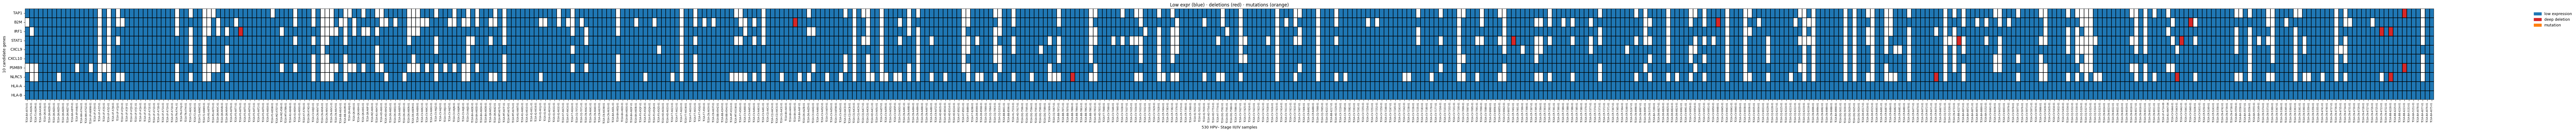

In [40]:
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

cmap = ListedColormap(['white', '#1f77b4', '#d62728', '#ff7f0e'])

plt.figure(figsize=(len(subset_ids)*0.18, 5))     # ← 0.18 instead of 0.28
ax = sns.heatmap(
    vis,
    cmap=cmap, vmin=0, vmax=3,
    cbar=False, linewidths=.3, linecolor='black'
)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0)
plt.xlabel(f'{len(subset_ids)} HPV– Stage III/IV samples')
plt.ylabel('10 candidate genes')
plt.title('Low expr (blue) · deletions (red) · mutations (orange)')

handles = [mpatches.Patch(color=cmap(i), label=l)
           for i, l in zip([1,2,3], ['low expression', 'deep deletion', 'mutation'])]
ax.legend(handles=handles, bbox_to_anchor=(1.04,1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

In [41]:
# cell 1 ── build visual-matrix
low_expr = (expr <= 1.0).astype(int)      # blue
cna_del  = (cna  <= -1.5).astype(int)     # red
vis = low_expr.copy()
vis[cna_del == 1] = 2
vis[mut      == 1] = 3

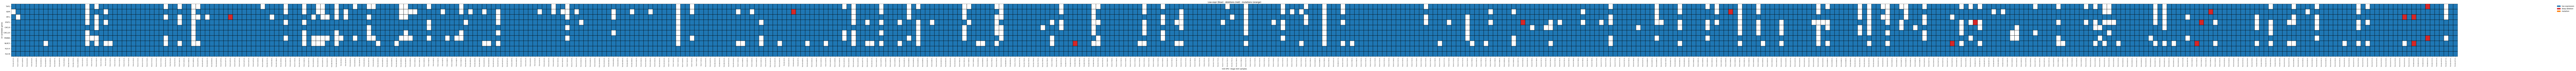

In [42]:
# cell 2 ── plot
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

cmap = ListedColormap(['white', '#1f77b4', '#d62728', '#ff7f0e'])

plt.figure(figsize=(len(subset_ids)*0.40, 6))          # ← wider & taller
ax = sns.heatmap(
    vis,
    cmap=cmap, vmin=0, vmax=3,
    cbar=False, linewidths=.3, linecolor='black'
)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0)
plt.xlabel(f'{len(subset_ids)} HPV– Stage III/IV samples')
plt.ylabel('10 candidate genes')
plt.title('Low expr (blue) · deletions (red) · mutations (orange)')

handles = [mpatches.Patch(color=cmap(i), label=l)
           for i, l in zip([1,2,3], ['low expression','deep deletion','mutation'])]
ax.legend(handles=handles, bbox_to_anchor=(1.04,1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

In [43]:
# save the current heat-map as a high-resolution PNG
plt.savefig("../docs/heatmap_epirevive_HPVneg_stage3-4.png",
            dpi=600, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>